# Lab02: Frequent itemset mining

- Student ID: 20120604
- Student name: Lương Văn Triều

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**

- Frequent itemset mining.

# 1. Preliminaries
## This is how it all started ...
- Rakesh Agrawal, Tomasz Imielinski, Arun N. Swami: Mining Association Rules between Sets of Items in Large Databases. SIGMOD Conference 1993: 207-216
- Rakesh Agrawal, Ramakrishnan Srikant: Fast Algorithms for Mining Association Rules in Large Databases. VLDB 1994: 487-499

**These two papers are credited with the birth of Data Mining**
## Frequent itemset mining (FIM)

Find combinations of items (itemsets) that occur frequently.
## Applications
- Items = products, transactions = sets of products someone bought in one trip to the store.
$\Rightarrow$ items people frequently buy together.
    + Example: if people usually buy bread and coffee together, we run a sale of bread to attract people attention and raise price of coffee.
- Items = webpages, transactions = words. Unusual words appearing together in a large number of documents, e.g., “Brad” and “Angelina,” may indicate an interesting relationship.
- Transactions = Sentences, Items = Documents containing those sentences. Items that appear together too often could represent plagiarism.

## Transactional Database
A transactional database $D$ consists of $N$ transactions: $D=\left\{T_1,T_2,...,T_N\right\}$. A transaction $T_n \in D (1 \le n \le N)$ contains one or more items and that $I= \left\{ i_1,i_2,…,i_M \right\}$ is the set of distinct items in $D$, $T_n \subset I$. Commonly, a transactional database is represented by a flat file instead of a database system: items are non-negative integers, each row represents a transaction, items in a transaction separated by space.

Example: 

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

30 31 32 

33 34 35 

36 37 38 39 40 41 42 43 44 45 46 

38 39 47 48 

38 39 48 49 50 51 52 53 54 55 56 57 58 

32 41 59 60 61 62 

3 39 48 

63 64 65 66 67 68 



# Definition

- Itemset: A collection of one or more items.
    + Example: {1 4 5}
- **k-itemset**: An itemset that contains k items.
- Support: Frequency of occurrence of an itemset.
    + Example: From the example above, item 3 appear in 2 transactions so its support is 2.
- Frequent itemset: An itemset whose support is greater than or equal to a `minsup` threshold

# The Apriori Principle
- If an itemset is frequent, then all of its subsets must also be frequent.
- If an itemset is not frequent, then all of its supersets cannot be frequent.
- The support of an itemset never exceeds the support of its subsets.
$$ \forall{X,Y}: (X \subseteq Y) \Rightarrow s(X)\ge s(Y)$$


# 2. Implementation


## The Apriori algorithm
Suppose:

$C_k$ candidate itemsets of size k.

$L_k$ frequent itemsets of size k.

The level-wise approach of Apriori algorithm can be descibed as follow:
1. k=1, $C_k$ = all items.
2. While $C_k$ not empty:
    3. Scan the database to find which itemsets in $C_k$ are frequent and put them into $L_k$.
    4. Use $L_k$ to generate a collection of candidate itemsets $C_{k+1}$ of size k+1.
    5. k=k+1.

### Import library

In [21]:
from collections import defaultdict

### Read data
First we have to read data from database

In [22]:

def readData(path):
    """
    Parameters
    --------------------------
        path: path of database D.
         
    --------------------------
    Returns
        data: a dictionary for representing database D
                 - keys: transaction tids
                 - values: itemsets.
        s: support of distict items in D.
    """
    data={}
    s=defaultdict(lambda: 0) # Initialize a dictionary for storing support of items in I.  
    with open(path,'rt') as f:
        tid=1;
        for line in f:
            itemset=set(map(int,line.split())) # a python set is a native way for storing an itemset.
            for item in itemset:  
                s[item]+=1     #Why don't we compute support of items while reading data?
            data[tid]= itemset
            tid+=1
    
    return data, s

### Tree Projection

**I gave you pseudo code of Apriori algorithm above but we implement Tree Projection. Tell me the differences of two algorithms.**


**TODO:**

In [23]:
def joinset(a, b):
    '''
    Parameters
    -------------------
        2 itemsets a and b (of course they are at same branch in search space)

    -------------------
    return
        ret: itemset generated by joining a and b
    '''
    # TODO (hint: this function will be called in generateSearchSpace method.):
    ret = list(set(a+b))
    return ret

class TP:
    def __init__(self, data=None, s=None, minSup=None):
        self.data = data
        self.s = {}

        for key, support in sorted(s.items(), key=lambda item: item[1]):
            self.s[key] = support
        # TODO: why should we do this, answer it at the markdown below?

        self.minSup = minSup
        self.L = {}  # Store frequent itemsets mined from database
        self.runAlgorithm()

    def initialize(self):
        """
        Initialize search space at first step
        --------------------------------------
        We represent our search space in a tree structure
        """
        tree = {}

        search_space = {}
        for item, support in self.s.items():
            search_space[item] = {}

            search_space[item]['itemset'] = [item]
            ''' 
            python set does not remain elements order
            so we use a list to extend it easily when create new itemset 
            but why we store itemset in data by a python set???? '''
            # TODO: study about python set and its advantages,
            # answer at the markdown below.

            search_space[item]['pruned'] = False
            # TODO:
            # After finish implementing the algorithm tell me why should you use this
            # instead of delete item directly from search_space and tree.

            search_space[item]['support'] = support

            tree[item] = {}
            '''
            Why should i store an additional tree (here it called tree)? 
            Answer: This really help in next steps.

            Remember that there is always a big gap from theory to practicality
            and implementing this algorithm in python is not as simple as you think.
            '''

        return tree, search_space

    def computeItemsetSupport(self, itemset):

        '''Return support of itemset'''
        # TODO (hint: this is why i use python set in data)
        support = 0
        for tid, itemsets in self.data.items():
            if itemset.issubset(itemsets):
                support += 1
        return support

    def get_sub_tree(self, k, tree, search_space, itter_node):
        if k == 0:
            return search_space[itter_node]['support']
        subtree = search_space[itter_node]
        for node in subtree.keys():
            k-=1
            self.get_sub_tree(k,tree,search_space,node)


    def prune(self, k, tree, search_space):

        '''
        In this method we will find out which itemset in current search space is frequent
        itemset then add it to L[k]. In addition, we prune those are not frequent itemsets.
        '''
        if self.L.get(k) is None: self.L[k] = []
        # TODO
        for item in list(search_space.keys()):
            itemset = search_space[item]['itemset']
            support = self.computeItemsetSupport(set(itemset))
            if support >= self.minSup:
                self.L[k].append(itemset)
            else:
                search_space[item]['pruned'] = True





    def generateSearchSpace(self, k, tree, search_space):
        items = list(tree.keys())

        l = len(items)
        self.prune(k, tree, search_space)
        if l == 0: return  # Stop condition
        for i in range(l - 1):
            sub_search_space = {}
            sub_tree = {}
            a = items[i]
            if search_space[a]['pruned']: continue

            for j in range(i + 1, l):
                b = items[j]
                search_space[a][b] = {}
                tree[a][b] = {}
                # You really need to understand what am i doing here before doing work below.
                # (Hint: draw tree and search space to draft).

                # TODO:
                # First create newset using join set
                newset = joinset(search_space[a]['itemset'], search_space[b]['itemset'])
                
                
                # Second add newset to search_space
                #search_space[a][b]['itemset'] = newset
                
                # First create a new dictionary for the new itemset [59, 68]
                new_dict = {}
                new_dict['itemset'] = newset
                new_dict['pruned'] = False

                # Compute the support of the new itemset [59, 68]
                support = self.computeItemsetSupport(set(newset))
                new_dict['support'] = support

                # Add the new dictionary to the sub_search_space dictionary
                sub_search_space[tuple(newset)] = new_dict
                sub_tree[tuple(newset)] = {}
                
                
            #  Generate search_space for k+1-itemset
            self.generateSearchSpace(k + 1, sub_tree, sub_search_space)

    def runAlgorithm(self):
        tree, search_space = self.initialize()  # generate search space for 1-itemset
        self.generateSearchSpace(1, tree, search_space)

    def miningResults(self):
        return self.L

Ok, let's test on a typical dataset `chess`.

In [24]:
data, s= readData('chess.txt')

In [25]:
#
a=TP(data=data,s=s, minSup=3000)
print(a.miningResults())

{1: [[48], [56], [66], [34], [62], [7], [36], [60], [40], [29], [52], [58]], 2: [[48, 52], [48, 58], [56, 29], [56, 52], [56, 58], [66, 60], [66, 29], [66, 52], [66, 58], [40, 34], [34, 29], [34, 52], [34, 58], [60, 62], [40, 62], [29, 62], [52, 62], [58, 62], [60, 7], [40, 7], [29, 7], [52, 7], [58, 7], [36, 60], [40, 36], [36, 29], [36, 52], [58, 36], [40, 60], [60, 29], [60, 52], [58, 60], [40, 29], [40, 52], [40, 58], [52, 29], [58, 29], [58, 52]], 3: [[48, 58, 52], [56, 52, 29], [56, 58, 29], [56, 58, 52], [66, 60, 29], [66, 60, 52], [66, 60, 58], [66, 52, 29], [66, 58, 29], [66, 52, 58], [40, 34, 29], [40, 34, 52], [40, 34, 58], [34, 52, 29], [34, 58, 29], [34, 52, 58], [60, 29, 62], [60, 62, 52], [58, 60, 62], [40, 29, 62], [40, 52, 62], [40, 58, 62], [52, 29, 62], [58, 29, 62], [58, 52, 62], [40, 60, 7], [60, 29, 7], [60, 52, 7], [58, 60, 7], [40, 29, 7], [40, 52, 7], [40, 58, 7], [52, 29, 7], [58, 29, 7], [58, 52, 7], [40, 36, 60], [36, 29, 60], [36, 60, 52], [58, 36, 60], [40

### Answer questions here:
**Why don't we compute support of items while reading data?**
- The implementation of the given readData() function computes the support of distinct items in the database after reading the entire data.The function initializes an empty dictionary s to store the support count of each item in the dataset, and updates the count of each item as it reads through the transactions.

- While it is possible to compute the support of each item while reading the data, it may not always be the most efficient approach.In some cases, the dataset may be too large to fit into memory, or the dataset may be stored in a format that is not optimized for random access.In such cases, it may be more efficient to read the data once to identify all the distinct items in the dataset and their counts, and then perform subsequent operations using the precomputed support counts.

- Furthermore, precomputing the support counts can also help in optimizing frequent itemset mining algorithms.The Apriori algorithm, for example, generates candidate itemsets by joining frequent k-1 itemsets, and checks their support counts in the dataset.If the support counts of individual items are already precomputed, the algorithm can avoid expensive scans of the entire dataset to count the support of each candidate itemset.

**why should we do sort**
- In the context of frequent itemset mining, sorting is often used to optimize the performance of the algorithms.Specifically, sorting the items in the dataset based on their support counts can help in reducing the number of scans and comparisons required to generate frequent itemsets.

- When mining for frequent itemsets using algorithms like Apriori, it is common to generate candidate itemsets by joining frequent k-1 itemsets.Sorting the items in the dataset based on their support counts can help in identifying the most frequent items quickly and efficiently, allowing the algorithm to prune the search space and focus on the most promising candidates.

- Moreover, when the dataset is stored in a sparse format, such as the transactional format, sorting the items can help in reducing the I/O overhead required to access and manipulate the data.By sorting the items, the algorithm can group the transactions based on their common items, allowing it to process the data in a more cache-friendly manner.

- Overall, while sorting is not always necessary, it can significantly improve the performance of frequent itemset mining algorithms, especially when dealing with large and sparse datasets.

**study about python set and its advantages ?**
- The given __init__() function initializes an instance of a frequent itemset mining algorithm, where data represents the input dataset, s represents the precomputed support counts of the individual items in the dataset, and minSup represents the user-defined minimum support threshold.

- In the initialization code, the s dictionary is sorted based on the support count of each item, in ascending order.Sorting the items by their support count can be useful in optimizing the frequent itemset mining algorithm.By sorting the items in ascending order, the algorithm can begin by processing the infrequent items and their corresponding itemsets, allowing it to prune the search space and focus on the most promising candidates quickly.

- Moreover, by storing the sorted s dictionary in the object instance, the frequent itemset mining algorithm can access the support count of each item quickly and efficiently during the mining process.

- Overall, by sorting the s dictionary, the frequent itemset mining algorithm can improve its performance by focusing on the infrequent items and their itemsets first, leading to more efficient pruning of the search space and faster discovery of frequent itemsets.

**After finish implementing the algorithm tell me why should you use this? Instead of delete item directly from search_space and tree.**
- The initialize() function initializes the search space at the first step of the frequent itemset mining algorithm.The search space is represented in a tree structure, where each node in the tree corresponds to an item, and the edges connect items that belong to the same itemset.

- The search_space dictionary stores information about each item, including its itemset, support count, and whether it has been pruned or not.The tree dictionary stores the same information in a tree structure, where each node corresponds to an item, and its children correspond to the items that can be added to the itemset.

- Instead of deleting items directly from the search_space and tree dictionaries, the algorithm sets the pruned flag to True to mark the item as pruned.This is because deleting items directly from the dictionaries can be computationally expensive, especially if the dictionaries are large.By setting the pruned flag, the algorithm can quickly skip over the pruned items during subsequent iterations of the mining process.

- Moreover, storing the search space in both a dictionary and a tree structure can be useful for optimizing the frequent itemset mining algorithm.For example, the tree structure can be used to quickly identify the children of a given node, allowing the algorithm to efficiently generate candidate itemsets.Additionally, by storing the search space in a dictionary, the algorithm can quickly access the itemset, support count, and pruned flag of each item during the mining process.

**Apriori algorithm and Tree Projection, tell me the differences of two algorithms.**
- Apriori algorithm and Tree Projection are two common algorithms used for frequent itemset mining.

- The Apriori algorithm is an iterative algorithm that works by generating a candidate set of itemsets at each iteration and pruning the candidate set based on the minimum support threshold.The algorithm begins by generating frequent itemsets of size 1 (i.e., individual items), and then iteratively generates candidate itemsets of size k+1 from the frequent itemsets of size k.The candidate itemsets are then pruned based on their support count, and the process continues until no new frequent itemsets can be generated.

- Tree Projection, on the other hand, is an optimization technique used in frequent itemset mining that exploits the structure of the search space to reduce the number of candidate itemsets that need to be generated and checked.In Tree Projection, the search space is represented as a tree structure, where each node in the tree represents an item and the edges represent the inclusion of that item in an itemset.The algorithm first generates the frequent itemsets of size 1 and then projects the database onto each frequent item to create a conditional database.The frequent itemsets of size k+1 are then generated by recursively mining the conditional database.

- The main difference between the Apriori algorithm and Tree Projection is that the Apriori algorithm generates candidate itemsets at each iteration based on the frequent itemsets of size k, while Tree Projection generates candidate itemsets by recursively mining the conditional database.Tree Projection can be more efficient than the Apriori algorithm for large datasets because it generates fewer candidate itemsets to check.However, the efficiency of Tree Projection depends on the distribution of the data and the structure of the search space.In some cases, the Apriori algorithm may be more efficient than Tree Projection.


# 3. Churn analysis

In this section, you will use frequent itemset mining technique to analyze `churn` dataset (for any purposes). 

*Remember this dataset is not represented as a transactional database, first thing that you have to do is transforming it into a flat file. 


In [26]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
%matplotlib inline
import seaborn as sns

In [27]:
# Read data from churn.csv
telecom_df =pd.read_csv("churn.csv")

In [28]:
# View the data of top 10 rows to look the glimps of the data
telecom_df.head(10)

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [29]:
# View the data of bottom 10 rows to look the glimps of the data
telecom_df.tail(10)

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [30]:
# Getting all the columns
telecom_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

# Analyze:
*STATE*: 51 Unique States name

*Account Length*: Length of The Account

*Area Code*: Code Number of Area having some States

*International Plan*: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

*Voice Mail Plan*: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

*Number vmail messages*: Number of Voice Mail Messages ranging from 0 to 50

*Total day minutes*: Total Number of Minutes Spent in Morning

*Total day calls*: Total Number of Calls made in Morning.

*Total day charge*: Total Charge to the Customers in Morning.

*Total eve minutes*: Total Number of Minutes Spent in Evening

*Total eve calls*: Total Number of Calls made r in Evening.

*Total eve charge*: Total Charge to the Customers in Morning.

*Total night minutes*: Total Number of Minutes Spent in the Night.

*Total night calls*: Total Number of Calls made in Night.

*Total night charge*: Total Charge to the Customers in Night.

*Customer service calls*: Number of customer service calls made by customer

*Churn*: Customer Churn, True means churned customer, False means retained custome

In [31]:
#check details about the data set
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Intl Plan       3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [32]:
telecom_df.nunique()

State               51
Account Length     212
Area Code            3
Phone             3333
Intl Plan            2
VMail Plan           2
VMail Message       46
Day Mins          1667
Day Calls          119
Day Charge        1667
Eve Mins          1611
Eve Calls          123
Eve Charge        1440
Night Mins        1591
Night Calls        120
Night Charge       933
Intl Mins          162
Intl Calls          21
Intl Charge        162
CustServ Calls      10
Churn                2
dtype: int64

In [33]:
#Looking for the description of the dataset to get insights of the data
telecom_df.describe(include='all')

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [34]:
#Printing the count of true and false in 'churn' feature
print(telecom_df.Churn.value_counts())

Churn
False    2850
True      483
Name: count, dtype: int64


## Checking for Missing And Duplicate values

In [35]:
#check for count of missing values in each column.
telecom_df.isna().sum()
telecom_df.isnull().sum()
#as we see there are no missing values present in nay column.

State             0
Account Length    0
Area Code         0
Phone             0
Intl Plan         0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [36]:
# Checking Duplicate Values
len(telecom_df[telecom_df.duplicated()])

0

*As of now There are 3333 rows and 20 columns in above dataset.*

*out of which there are 1 boolean data type i.e churn*

*8 float data type*,

*8integer data type,*

*3 object data type i.e catagarical value are there.*

*There are no missing value present so no need to do the missing value imputation,*

*And also there are no duplicate value present.*

## Exploratory Data Analysis Of The Data Set

*Analyzing What The Dependent Variable Said To Us i.e 'CHURN'.*

In [37]:
#Printing the unique value inside "churn" column
telecom_df["Churn"].unique()

array([False,  True])

In [38]:
#Printing the count of true and false in 'churn' feature
print(telecom_df.Churn.value_counts())

Churn
False    2850
True      483
Name: count, dtype: int64


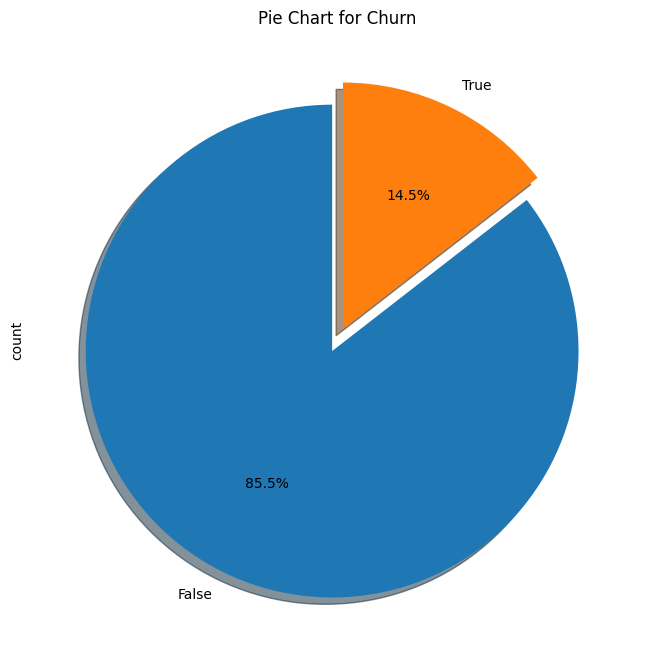

In [39]:
#To get the pie chart to analyze churn
import matplotlib.pyplot as plt

telecom_df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

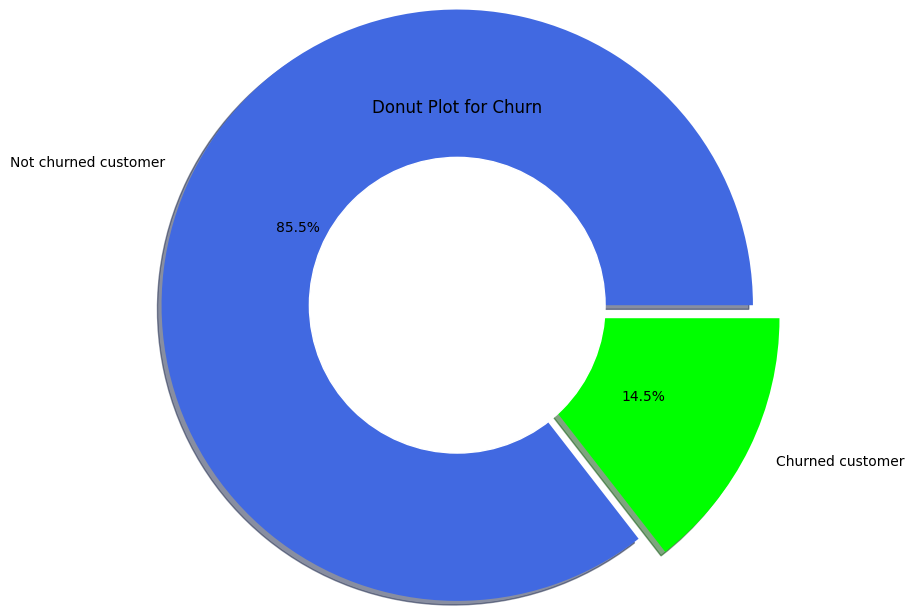

In [40]:
#To get the Donut Plot to analyze churn
data = telecom_df['Churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

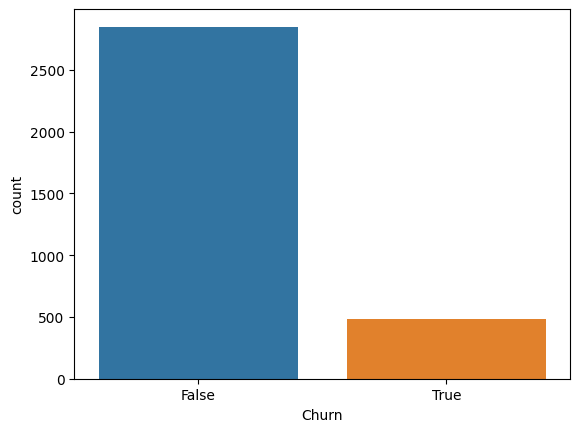

In [41]:
#let's see churn by using countplot
sns.countplot(x=telecom_df.Churn)

*After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn*

**Analyzing State Column**

In [42]:
#printing the unique value of sate column
telecom_df['State'].nunique()

51

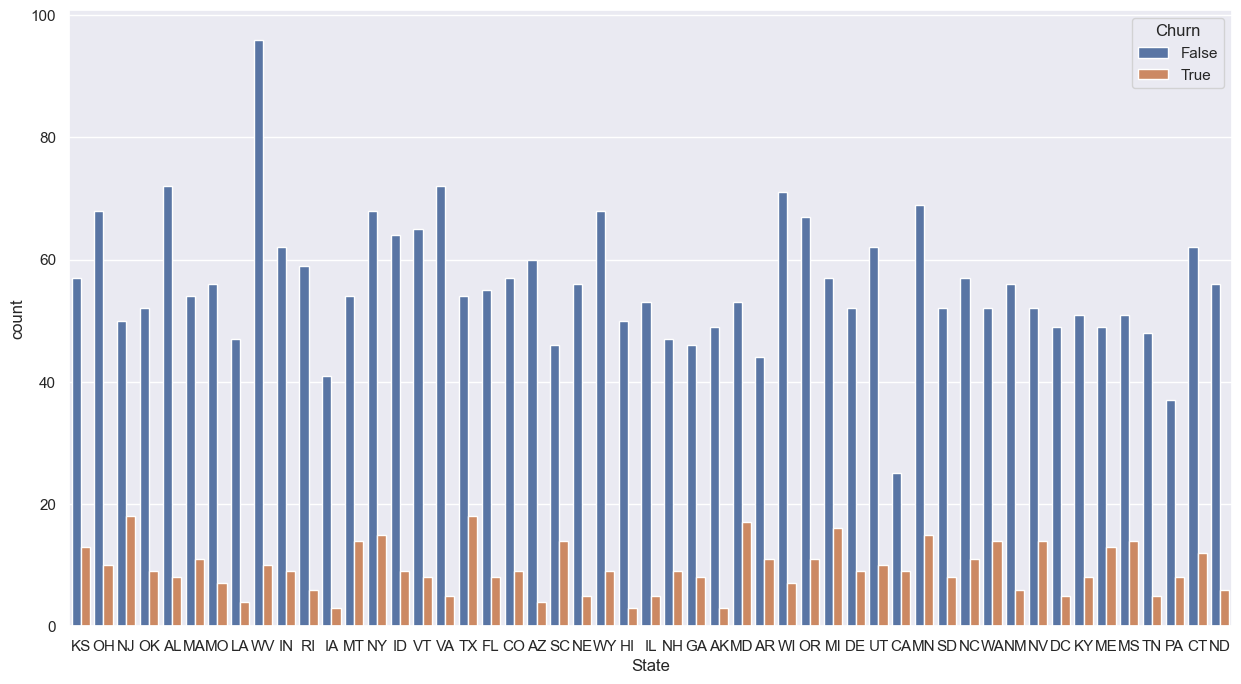

In [43]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=telecom_df)
plt.show()

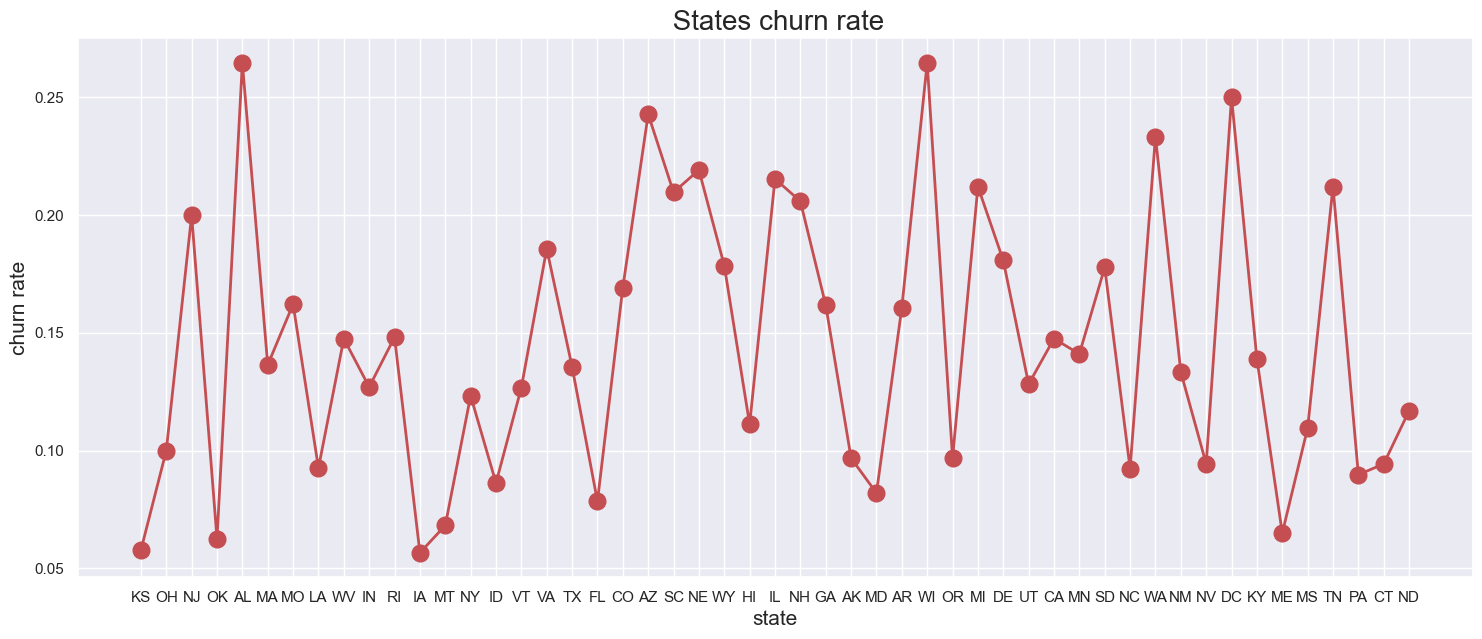

In [44]:
s1=telecom_df['State'].unique()
s2=telecom_df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

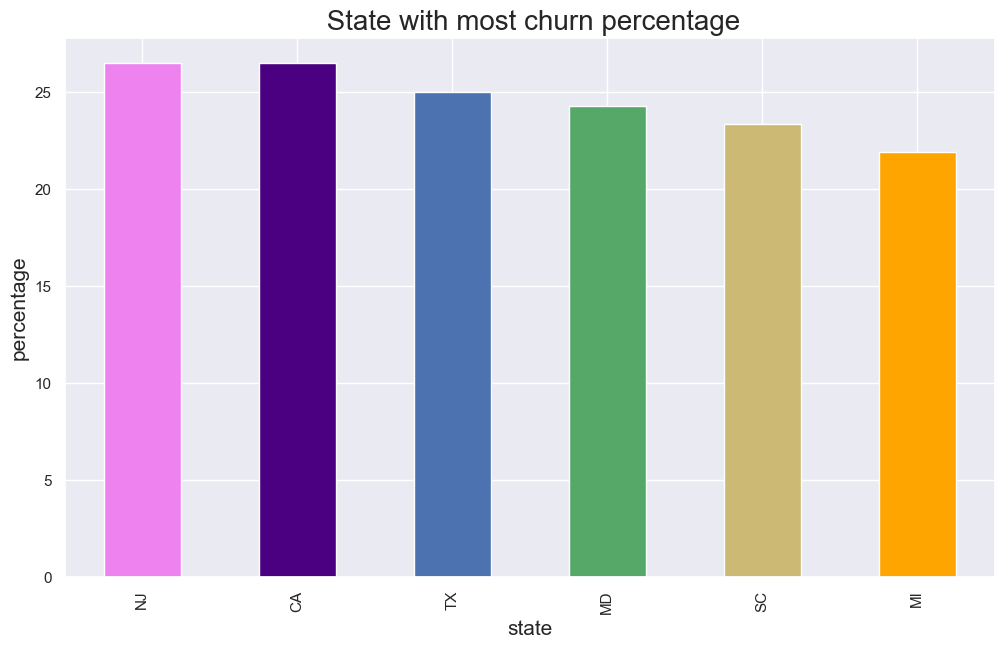

In [45]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((telecom_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [46]:
#calculate State vs Churn percentage
State_data = pd.crosstab(telecom_df["State"],telecom_df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [47]:
#show the most churn state of top 10 by ascending the above list
telecom_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

*There is 51 unique state present who have different churn rate.*

*From the above analysis CA, NJ, TX, MD, SC, MI are the ones who have a higher churn rate of more than 21.*

*The reason for this churn rate from a particular state may be due to the low coverage of the cellular network.*

**Analyzing "Area Code" column**

In [48]:
#calculate Area code vs Churn percentage
Area_code_data = pd.crosstab(telecom_df["Area Code"],telecom_df["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area Code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


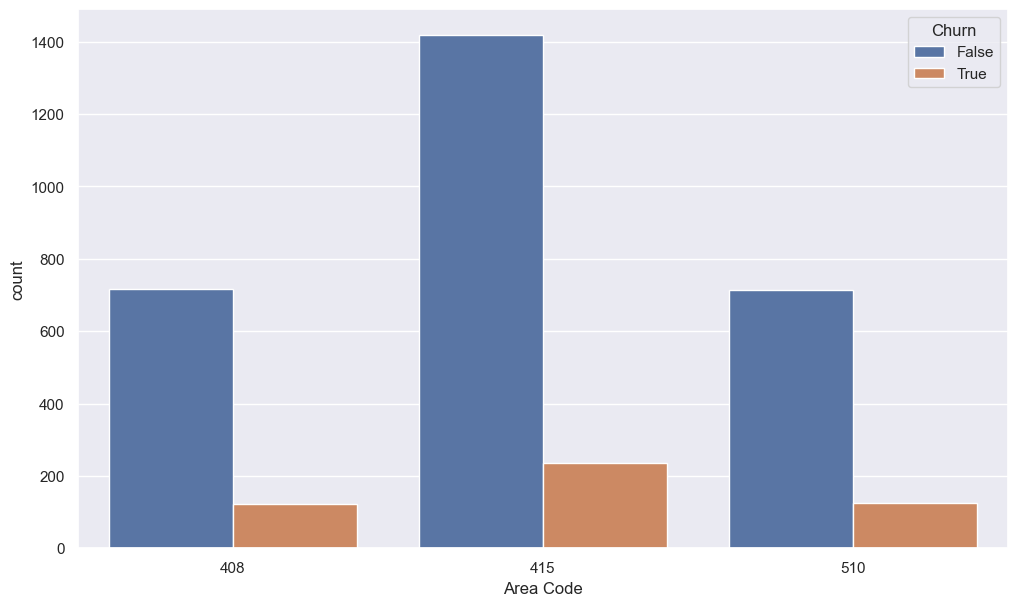

In [49]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Area Code', hue="Churn", data=telecom_df)
plt.show()

*In the above data, we notice that there is only 3 unique value are there i.e408,415,510 and the churn rate of these area codes are almost same.*

*we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.*

**Analyzing "Account Length" column**

In [50]:
#Separating churn and non churn customers
churn_df     = telecom_df[telecom_df["Churn"] == bool(True)]
not_churn_df = telecom_df[telecom_df["Churn"] == bool(False)]

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_4572\1643867195.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telecom_df['Account Length'])


<Axes: xlabel='Account Length', ylabel='Density'>

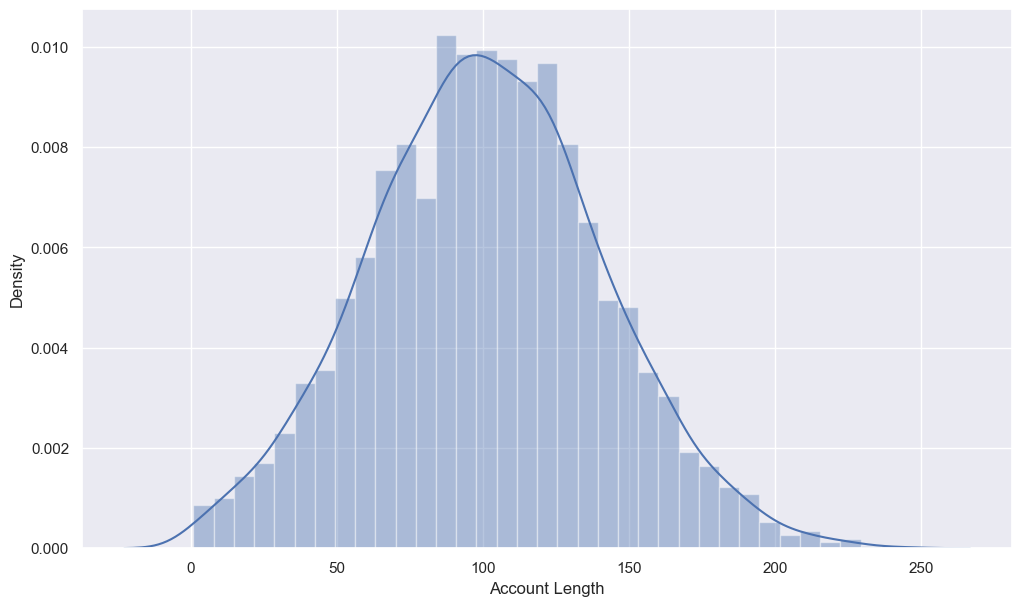

In [51]:
#Account length vs Churn
sns.distplot(telecom_df['Account Length'])

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_4572\3066582246.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telecom_df['Account Length'],color = 'yellow',label="All")
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_4572\3066582246.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chur

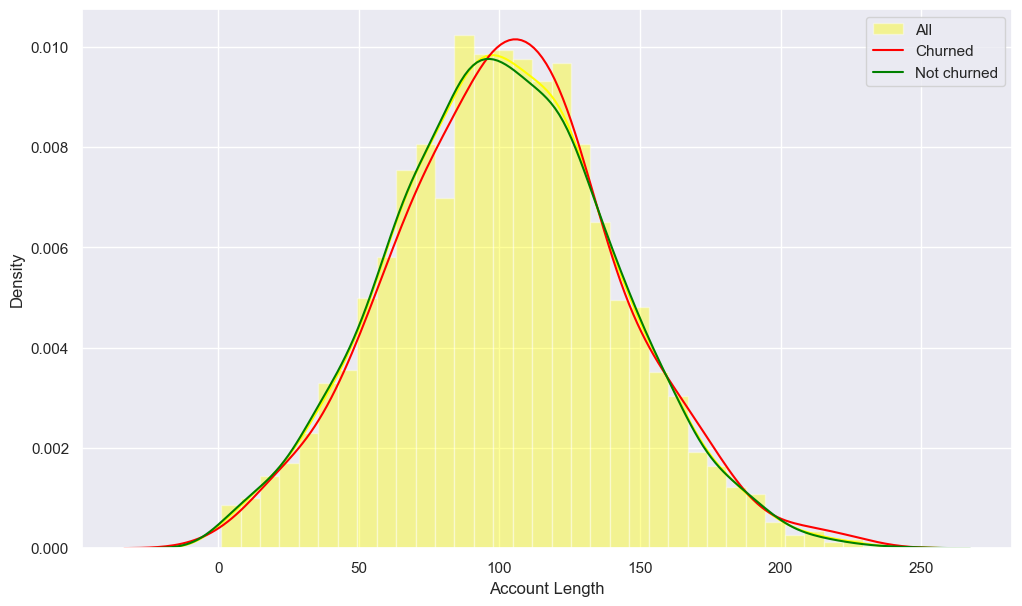

In [52]:
#comparison of churned account length and not churned account length 
sns.distplot(telecom_df['Account Length'],color = 'yellow',label="All")
sns.distplot(churn_df['Account Length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['Account Length'],color = 'green',hist= False,label="Not churned")
plt.legend()

*After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.*

**Analyzing "International Plan" column**

In [53]:
#Show count value of 'yes','no'
telecom_df['Intl Plan'].value_counts()

Intl Plan
no     3010
yes     323
Name: count, dtype: int64

In [54]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(telecom_df["Intl Plan"],telecom_df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn      False  True  Percentage Churn
Intl Plan                               
no          2664   346         11.495017
yes          186   137         42.414861


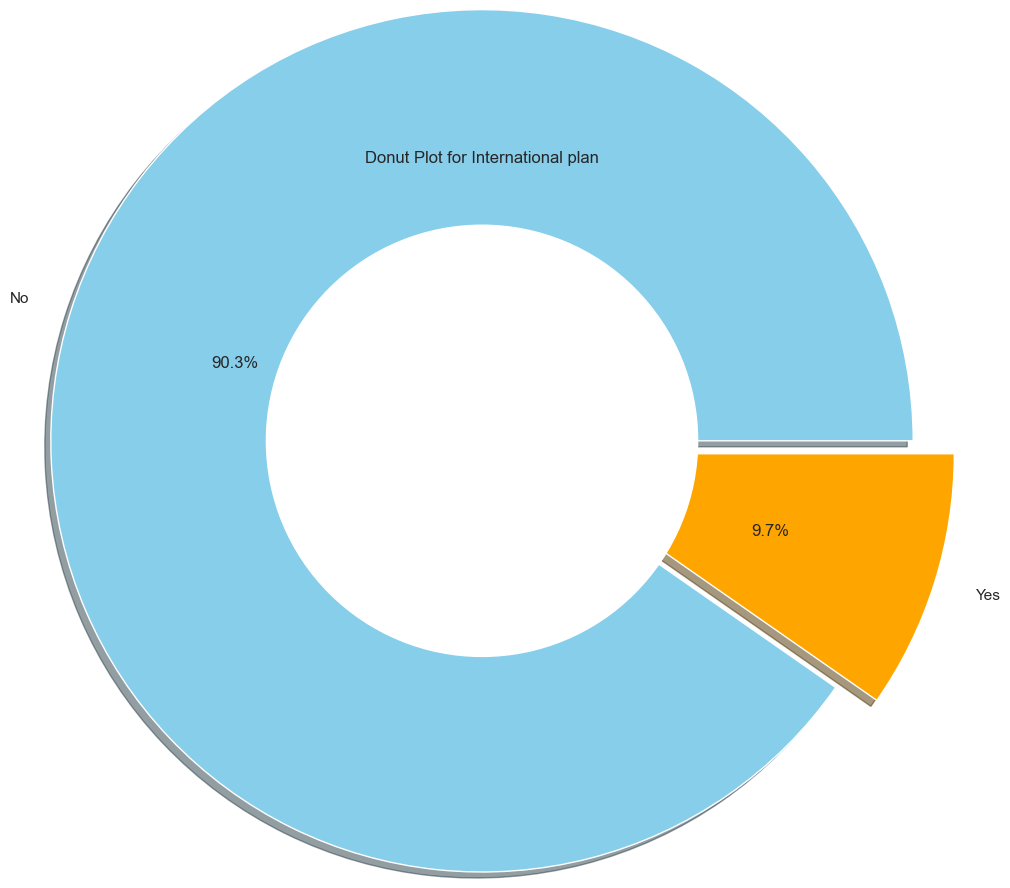

In [55]:
#To get the Donut Plot to analyze International Plan
data = telecom_df['Intl Plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

<Axes: xlabel='Intl Plan', ylabel='count'>

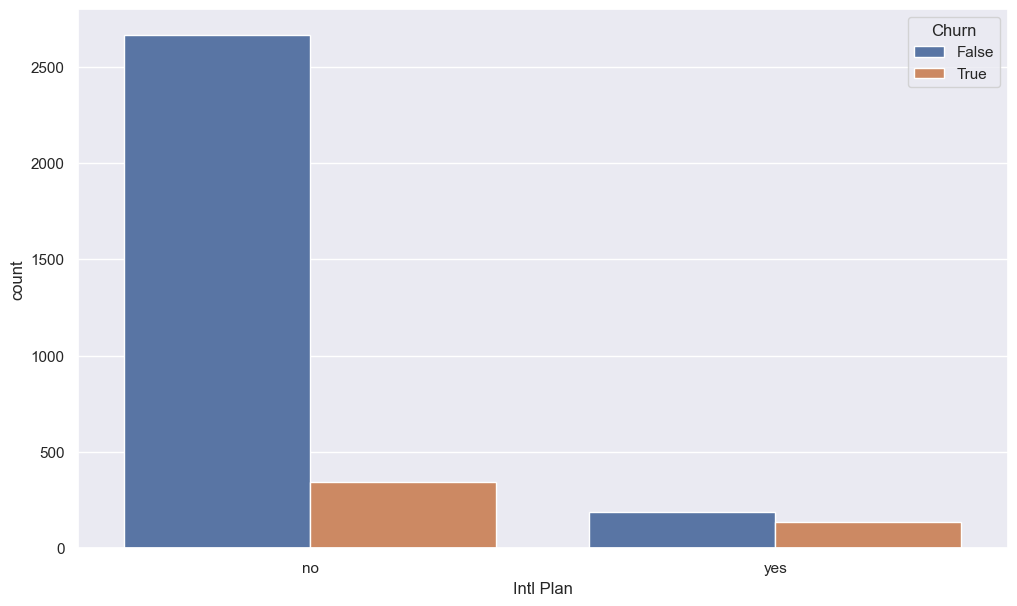

In [56]:
#Analysing by using countplot
sns.countplot(x='Intl Plan',hue="Churn",data = telecom_df)

*From the above data we get*

*There are 3010 customers who dont have a international plan.*

*There are 323 customers who have a international plan.*

*Among those who have a international plan 42.4 % people churn.*

*Whereas among those who dont have a international plan only 11.4 % people churn.*

*So basically the people who bought International plans are churning in big numbers.*

*Probably because of connectivity issues or high call charge.*

**Analyzing "Voice Mail Plan" column**

In [57]:
#show the unique value of the "Voice mail plan" column
telecom_df["VMail Plan"].unique()

array(['yes', 'no'], dtype=object)

In [58]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(telecom_df["VMail Plan"],telecom_df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn       False  True  Percentage Churn
VMail Plan                               
no           2008   403         16.715056
yes           842    80          8.676790


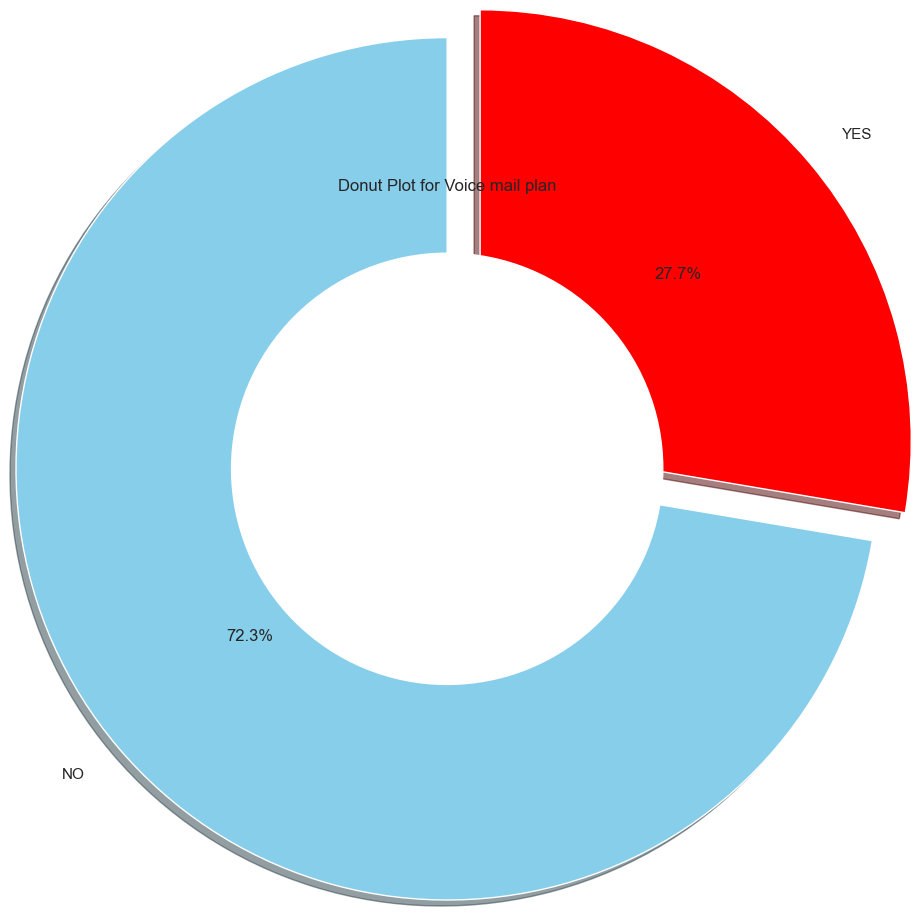

In [59]:
#To get the Donut Plot to analyze Voice mail plan
data = telecom_df["VMail Plan"].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

<Axes: xlabel='VMail Plan', ylabel='count'>

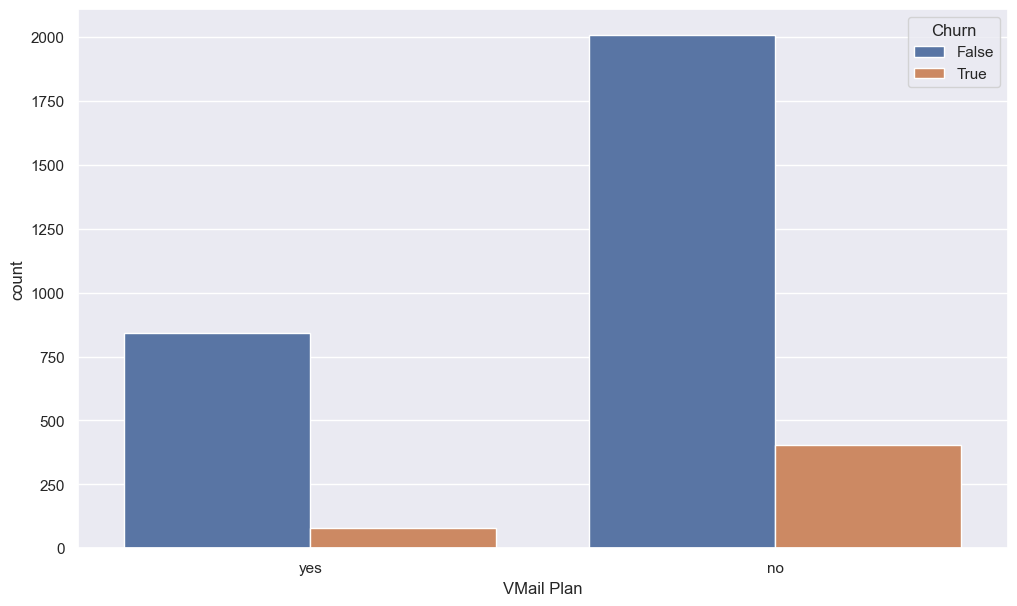

In [60]:
#Analysing by using countplot
sns.countplot(x="VMail Plan",hue="Churn",data = telecom_df)

*As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.*

**Analyzing "Number vmail messages" column**

In [61]:
#show the data of 'Number vmail messages' 
telecom_df['VMail Message'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int64)

In [62]:
#Printing the data of 'Number vmail messages'
telecom_df['VMail Message'].value_counts()

VMail Message
0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: count, dtype: int64

In [63]:
#Show the details of 'Number vmail messages' data
telecom_df['VMail Message'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: VMail Message, dtype: float64

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_4572\3556147286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telecom_df['VMail Message'])


<Axes: xlabel='VMail Message', ylabel='Density'>

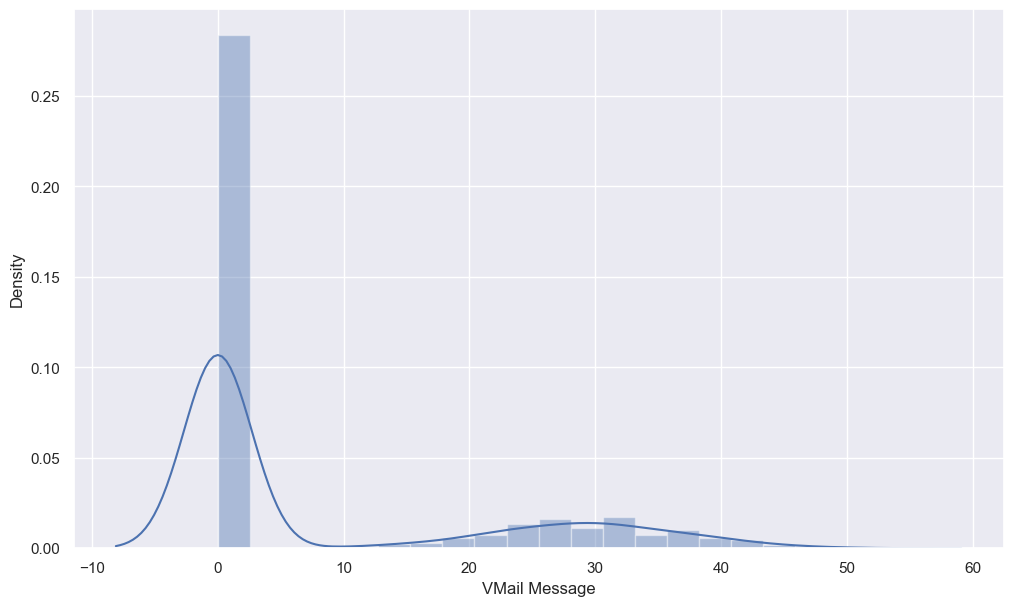

In [64]:
#Analysing by using displot diagram
sns.distplot(telecom_df['VMail Message'])

*After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn*

*For that, we need to improve the voice mail quality.*

**Analyzing "Customer service calls" column**

In [65]:
#Printing the data of customer service calls 
telecom_df['CustServ Calls'].value_counts()

CustServ Calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

<Axes: xlabel='CustServ Calls', ylabel='count'>

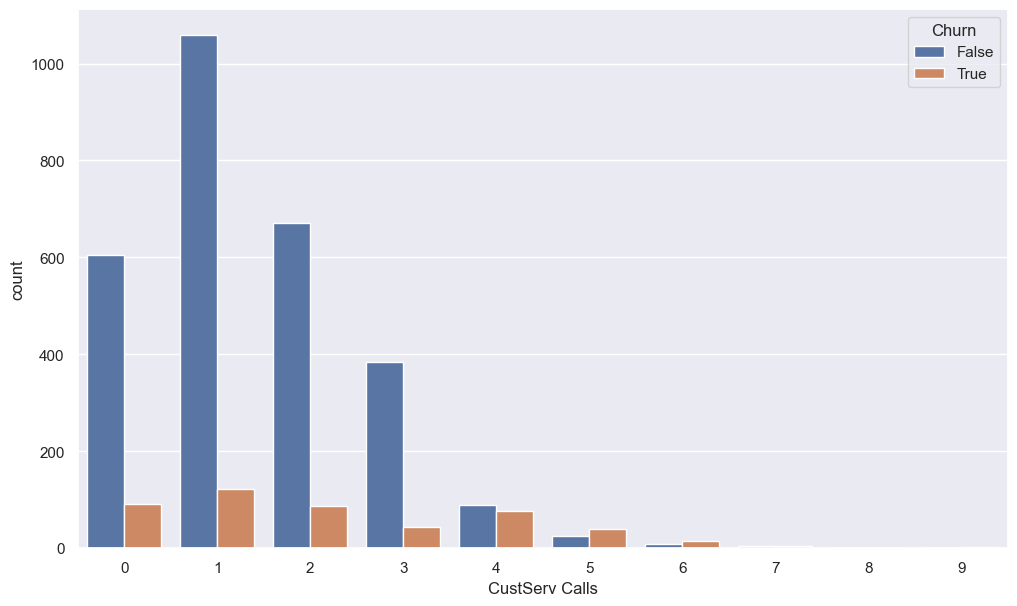

In [66]:
#Analysing using countplot
sns.countplot(x='CustServ Calls',hue="Churn",data = telecom_df)

*It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.*

*The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,*

*And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.*

*So operator should work to improve the service call.*

**Analyzing all calls minutes,all calls, all calls charge together**

*As these data sets are numerical data type, so for analysing with the 'churn' which is a catagorical data set, We are using mean, median, and box plots.*

In [67]:
#Print the mean value of churned and not churned customer 
print(telecom_df.groupby(["Churn"])['Day Calls'].mean())

Churn
False    100.283158
True     101.335404
Name: Day Calls, dtype: float64


<Axes: xlabel='Day Mins', ylabel='Day Charge'>

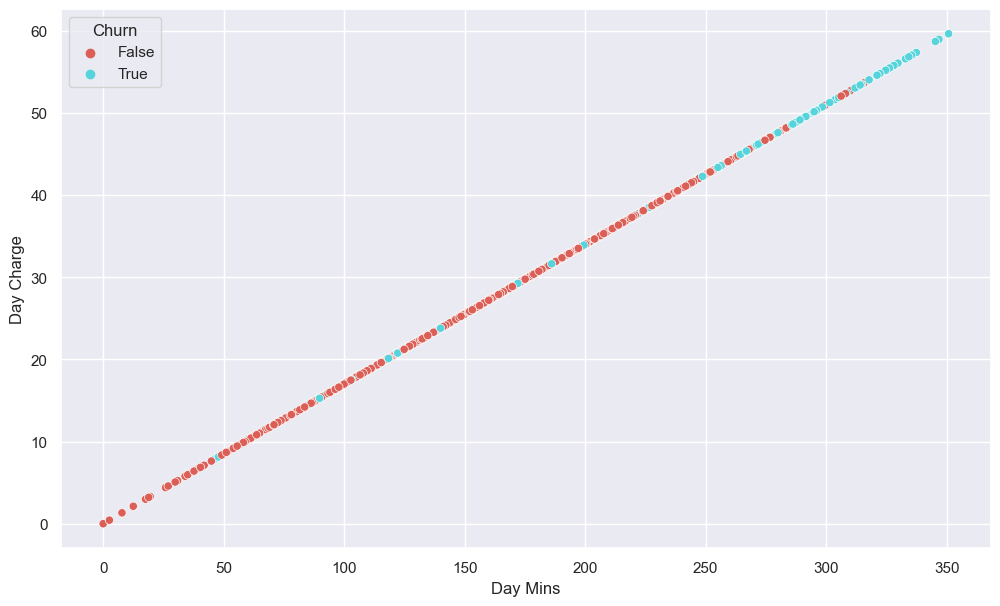

In [68]:
#show the relation using scatter plot
sns.scatterplot(x="Day Mins", y="Day Charge", hue="Churn", data=telecom_df,palette='hls')

In [69]:
#Print the mean value of churned and not churned customer 
print(telecom_df.groupby(["Churn"])['Eve Calls'].mean())

Churn
False    100.038596
True     100.561077
Name: Eve Calls, dtype: float64


In [70]:
#Print the mean value of churned and not churned customer 
print(telecom_df.groupby(["Churn"])['Eve Mins'].mean())

Churn
False    199.043298
True     212.410145
Name: Eve Mins, dtype: float64


In [71]:
#Print the mean value of churned and not churned customer 
print(telecom_df.groupby(["Churn"])['Eve Charge'].mean())

Churn
False    16.918909
True     18.054969
Name: Eve Charge, dtype: float64


<Axes: xlabel='Eve Mins', ylabel='Eve Charge'>

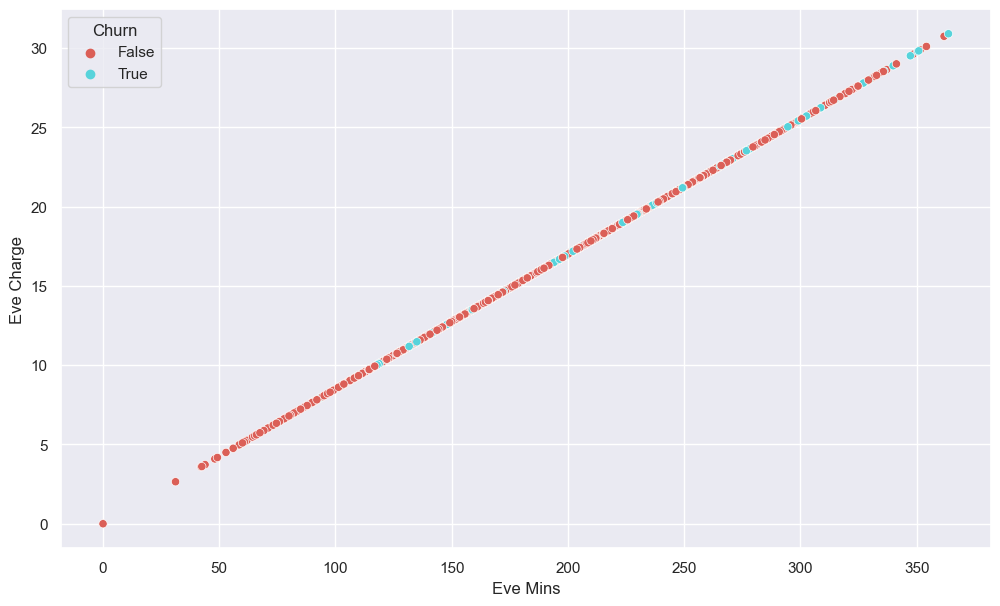

In [72]:
#show the relation using scatter plot
sns.scatterplot(x="Eve Mins", y="Eve Charge", hue="Churn", data=telecom_df,palette='hls')

<Axes: xlabel='Night Mins', ylabel='Night Charge'>

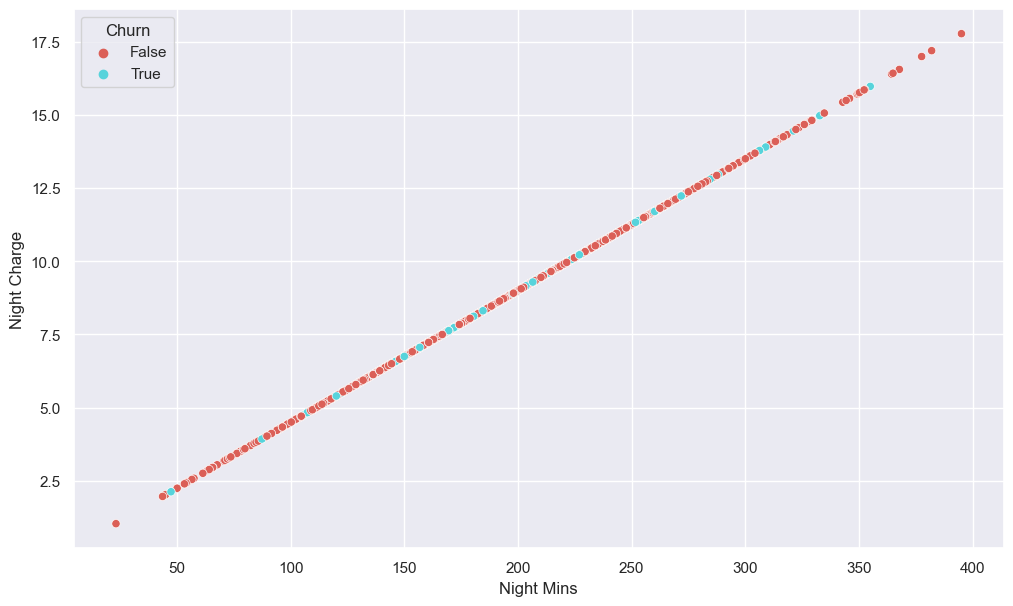

In [75]:
#show the relation using scatter plot
sns.scatterplot(x="Night Mins", y="Night Charge", hue="Churn", data=telecom_df,palette='hls')

<Axes: xlabel='Intl Mins', ylabel='Intl Charge'>

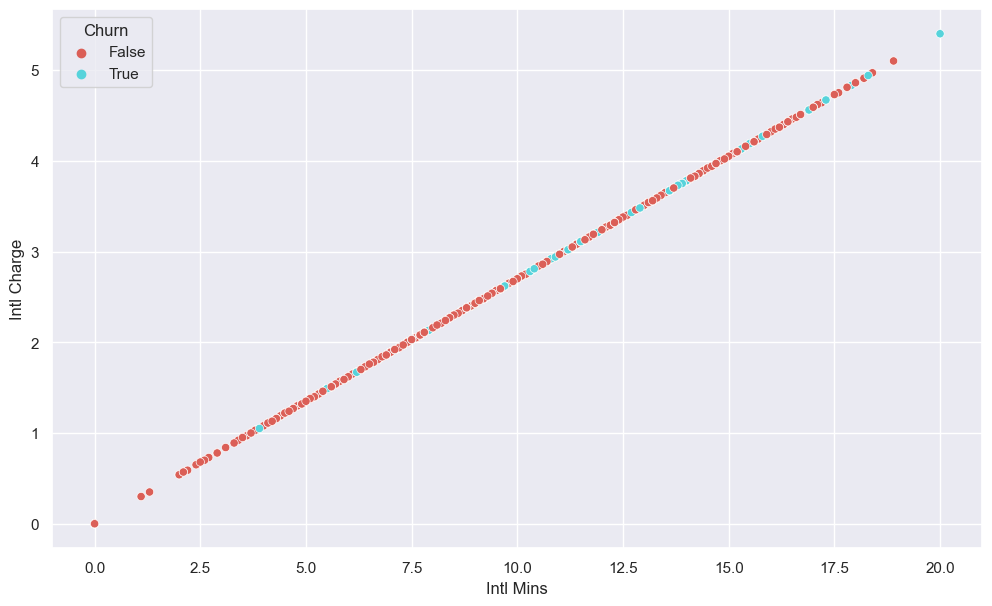

In [74]:
#show the relation using scatter plot
sns.scatterplot(x="Intl Mins", y="Intl Charge", hue="Churn", data=telecom_df,palette='hls')

In [76]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = telecom_df['Day Charge'].mean()/telecom_df['Day Mins'].mean()
eve_charge_perm = telecom_df['Eve Charge'].mean()/telecom_df['Eve Mins'].mean()
night_charge_perm = telecom_df['Night Charge'].mean()/telecom_df['Night Mins'].mean()
int_charge_perm= telecom_df['Intl Charge'].mean()/telecom_df['Intl Mins'].mean()

<Axes: >

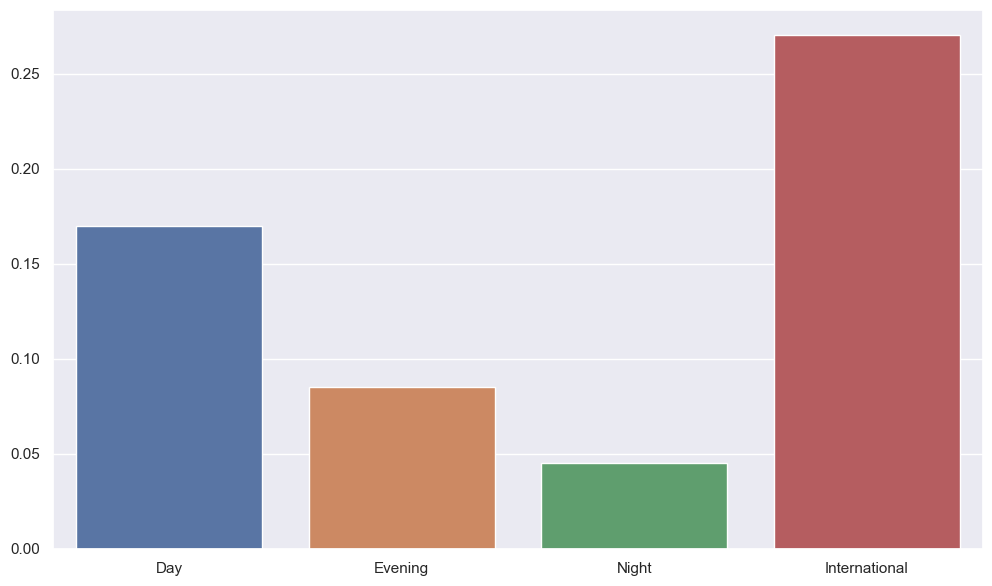

In [77]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

*After analyzing the above dataset we have noticed that total day/night/eve minutes/call/charges are not put any kind of cause for churn rate. But international call charges are high as compare to others it's an obvious thing but that may be a cause for international plan customers to churn out.*

**CONCLUSION:**

*After performing exploratory data analysis on the data set, this is what we have incurred from data:*

*There are some states where the churn rate is high as compared to others may be due to low network coverage.*
*Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns* 
*In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge* 
*IN the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good. *Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate.* 
*In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.* 
*In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.*

**RECCOMENDATIONS:**

*Improve network coverage churned state*
*In international plan provide some discount plan to the customer*
*Improve the voice mail quality or take feedback from the customer*
*Improve the service of call center and take frequently feedback from the customer regarding their issue and try to solve it as soon as possible*

# 4 References

Feel free to send questions to my email address: nnduc@fit.hcmus.edu.vn
